In [0]:
!pip install tensorflow-gpu==1.14
!pip install keras

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras
from keras.layers import BatchNormalization
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train = X_train.reshape(60000,-1)
X_test = X_test.reshape(10000, -1)

In [0]:
# from 0-255 changing 0-1

X_train = X_train.astype(float)/255
#y_train = y_train.astype(float)/255
X_test = X_test.astype(float)/255
#y_test = y_test.astype(float)/255


In [0]:
# Convert labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Accuracy on test data is :  0.9854
Accuracy on train data is :  0.9987999999682109
Prediction : 7 --> Expected : 7
Prediction : 2 --> Expected : 2
Prediction : 1 --> Expected : 1
Prediction : 0 --> Expected : 0
Prediction : 4 --> Expected : 4


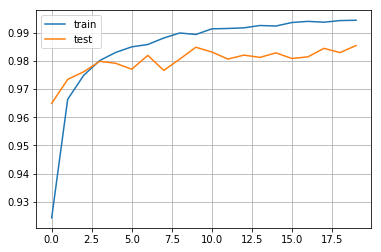

**************************************************
Accuracy on test data is :  0.9848
Accuracy on train data is :  0.9989999999682109
Prediction : 7 --> Expected : 7
Prediction : 2 --> Expected : 2
Prediction : 1 --> Expected : 1
Prediction : 0 --> Expected : 0
Prediction : 4 --> Expected : 4


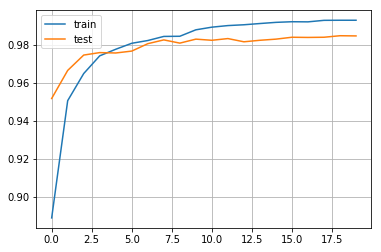

**************************************************


In [0]:
# Lets start building model

opt = ["adam", SGD(lr = 0.01, momentum=0.99)]

for optm in opt:
  # Define Keras Model
  model = Sequential()
  model.add(Dense(512, input_dim=784, activation="relu", kernel_initializer="he_uniform"))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation="relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(Dense(10,activation="softmax"))

  # Compile Keras model
  
  model.compile(loss="categorical_crossentropy", optimizer=optm, metrics=["accuracy"])

  # Train and Fit keras model
  history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test), verbose=0)

  # Evaluate model
  _, accuracy = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
  print("Accuracy on test data is : ", accuracy)
  
  _, accuracy = model.evaluate(X_train, y_train, batch_size=128, verbose=0)
  print("Accuracy on train data is : ", accuracy)

  # Predictions
  predictions = model.predict_classes(X_test)
  for i in range(5):
    print("Prediction : {} --> Expected : {}".format(predictions[i], np.argmax(y_test[i])))
    
  # Plotting
  plt.plot(history.history["acc"], label="train")
  plt.plot(history.history["val_acc"], label="test")
  plt.legend()
  plt.grid()
  plt.show()
  
  print("*"*50)